In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
#generate data
x = np.arange(0,100,1)
y = 2 * x + np.random.normal(0,10,size = (100))

x : sample , y : true solution , hx : prediction

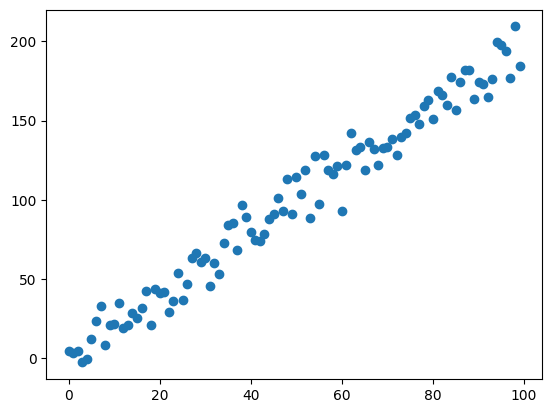

In [111]:
# show data
plt.scatter(x,y)
plt.show()

In [112]:
# define linear model with parameter w and b
def Model(x, w, b):
    x = np.array(x)
    return w * x + b

#define Loss function using MSE
def Loss(h, y):
    return np.mean((h - y)**2)

The loss function is defined in the following way: $l(w,b) = \frac{1}{N} \sum^i_{i=n}(h(x;w,b)-y)^2$. Ususally the loss function is divided by 2 to get rid of 2 in its derivative, but here we dont care that.

In [113]:
#Since we will use gradient descent, we find the derivative of loss function w.r.t w and b
def dLoss_w(h,y):
    return np.mean(2 * (h - y) * h)

def dLoss_b(h,y):
    return np.mean(2 * (h - y))

If the loss function is too complex to find its derivative, we can use the definition of df/dx which is $df/dx = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$ or $df/dx = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{2h} $

In [114]:
def train(epoches, learning_rate,x,y):
    w,b = [1,0]
    for epoch in range(epoches):
        #initialize w, b

        h = Model(x,w,b)
        loss = Loss(h,y)

        w -= learning_rate * dLoss_w(h,y)
        b -= learning_rate * dLoss_b(h,y)

        if epoch % 10 == 0:
            print('epoch: %d, loss: %.2f' %(epoch,loss))

    return w,b

In [115]:
epoches = 100
learning_rate = 1e-4
w,b = train(epoches,learning_rate,x,y)

epoch: 0, loss: 3283.08
epoch: 10, loss: 97.91
epoch: 20, loss: 97.91
epoch: 30, loss: 97.91
epoch: 40, loss: 97.91
epoch: 50, loss: 97.91
epoch: 60, loss: 97.91
epoch: 70, loss: 97.91
epoch: 80, loss: 97.91
epoch: 90, loss: 97.91


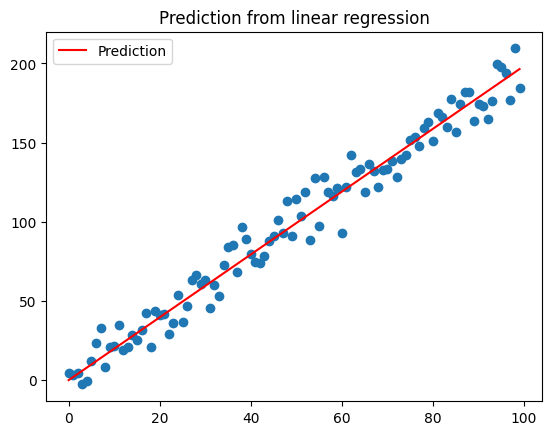

In [116]:
#plot the result
h = Model(x,w,b)
plt.plot(x,h,label = 'Prediction',color = 'red')
plt.scatter(x,y)
plt.title('Prediction from linear regression')
plt.legend()
plt.show()

The model will be more stable if we normalize the data

In [117]:
x_n = 0.01 * x

epoches = 200
learning_rate = 1e-2
w,b = train(epoches,learning_rate,x_n,y)

epoch: 0, loss: 12904.47
epoch: 10, loss: 111.00
epoch: 20, loss: 109.76
epoch: 30, loss: 108.64
epoch: 40, loss: 107.62
epoch: 50, loss: 106.68
epoch: 60, loss: 105.83
epoch: 70, loss: 105.06
epoch: 80, loss: 104.35
epoch: 90, loss: 103.71
epoch: 100, loss: 103.12
epoch: 110, loss: 102.59
epoch: 120, loss: 102.10
epoch: 130, loss: 101.66
epoch: 140, loss: 101.26
epoch: 150, loss: 100.89
epoch: 160, loss: 100.56
epoch: 170, loss: 100.26
epoch: 180, loss: 99.99
epoch: 190, loss: 99.74


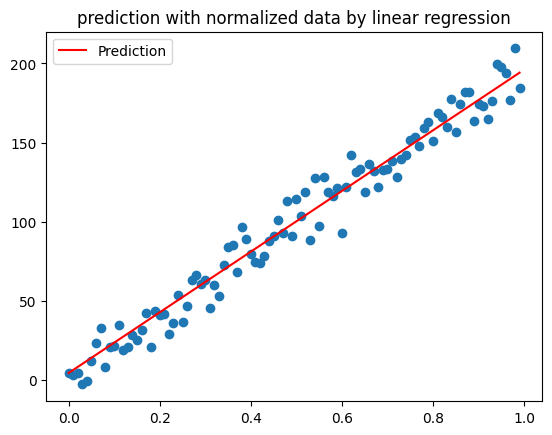

In [118]:
#plot the result
h = Model(x_n,w,b)
plt.plot(x_n,h,label = 'Prediction',color = 'red')
plt.scatter(x_n,y)
plt.title('prediction with normalized data by linear regression')
plt.legend()
plt.show()